# Storytelling with Open Data and Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 19:19:16) 
[GCC 7.2.0]


In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

#### About this dataset: https://data.novascotia.ca/Communications/News-Releases-Issued-by-Government-of-Nova-Scotia/xcif-vvr3

In [4]:
df = pd.read_csv("https://data.novascotia.ca/api/views/xcif-vvr3/rows.csv?accessType=DOWNLOAD")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25533 entries, 0 to 25532
Data columns (total 5 columns):
Department    25533 non-null object
Subject       25533 non-null object
Contents      25533 non-null object
URL           25533 non-null object
Timestamp     25533 non-null object
dtypes: object(5)
memory usage: 997.5+ KB


In [6]:
df.head(10)

,Department,Subject,Contents,URL,Timestamp
0,Natural Resources,Consultation Begins on Mineral Resources Act,NATURAL RESOURCES--Consultation Begins on Mine...,http://novascotia.ca/news/release/?id=20150102001,01/02/2015 09:57:00 AM
1,Transportation and Infrastructure Renewal,"Traffic Advisory, Lunenburg County",TRANSPORTATION/INFRASTRUCTURE RENEWAL--Traffic...,http://novascotia.ca/news/release/?id=20150106001,01/06/2015 10:19:00 AM
2,Premier's Office,Statement from the Premier's Office,PREMIER'S OFFICE--Statement from the Premier's...,http://novascotia.ca/news/release/?id=20150106002,01/06/2015 12:08:00 PM
3,Premier's Office,"Premier Extends Andrew Younger's Leave, Suspen...",PREMIER'S OFFICE--Premier Extends Andrew Young...,http://novascotia.ca/news/release/?id=20150107001,01/07/2015 11:23:00 AM
4,Human Rights Commission,Smith v. Capital Health District Authority Inq...,HUMAN RIGHTS COMMISSION--Smith v. Capital Heal...,http://novascotia.ca/news/release/?id=20150107002,01/07/2015 12:06:00 PM
5,Education and Early Childhood Development,Review of Regulated Child Care to Begin,EDUCATION/EARLY CHILDHOOD DEVELOPMENT--Review ...,http://novascotia.ca/news/release/?id=20150108001,01/08/2015 09:41:00 AM
6,Education and Early Childhood Development,Début de l'examen des services agréés de garde...,ÉDUCATION ET DÉVELOPPEMENT DE LA PETITE ENFANC...,http://novascotia.ca/news/release/?id=20150108002,01/08/2015 09:46:00 AM
7,Health and Wellness,Program to Keep New Doctors in Nova Scotia,HEALTH/WELLNESS--Program to Keep New Doctors i...,http://novascotia.ca/news/release/?id=20150108003,01/08/2015 10:18:00 AM
8,Internal Services,Landline Phone Contract Awarded,INTERNAL SERVICES--Landline Phone Contract Awa...,http://novascotia.ca/news/release/?id=20150108004,01/08/2015 02:36:00 PM
9,Municipal Affairs,Province Supports Accessibility Improvements t...,MUNICIPAL AFFAIRS--Province Supports Accessibi...,http://novascotia.ca/news/release/?id=20150108005,01/08/2015 02:39:00 PM


In [7]:
df.tail(10)

,Department,Subject,Contents,URL,Timestamp
25523,"Communities, Culture and Heritage",New Accessible Library Format Offered,COMMUNITIES/CULTURE/HERITAGE--New Accessible L...,http://novascotia.ca/news/release/?id=20170928002,09/28/2017 02:28:00 PM
25524,Nova Scotia Provincial Lotteries and Casino Co...,Responsible Gambling Awareness Week Focuses on...,N.S. PROVINCIAL LOTTERIES/CASINO CORP.--Respon...,http://novascotia.ca/news/release/?id=20170928003,09/28/2017 03:07:00 PM
25525,Transportation and Infrastructure Renewal,Weekly Traffic Advisories,TRANSPORTATION/INFRASTRUCTURE RENEWAL--Weekly ...,http://novascotia.ca/news/release/?id=20170929005,09/29/2017 05:17:00 PM
25526,Municipal Affairs,Legislative Amendments to Enhance Municipal Ex...,MUNICIPAL AFFAIRS--Legislative Amendments to E...,http://novascotia.ca/news/release/?id=20170928004,09/28/2017 04:16:00 PM
25527,"Communities, Culture and Heritage",Combat Sports Authority Act Introduced,COMMUNITIES/CULTURE/HERITAGE--Combat Sports Au...,http://novascotia.ca/news/release/?id=20170928005,09/28/2017 04:19:00 PM
25528,Internal Services,"Government Improving Information Access, Trans...",INTERNAL SERVICES--Government Improving Inform...,http://novascotia.ca/news/release/?id=20170928006,09/28/2017 04:24:00 PM
25529,Environment,Cap and Trade Legislation Introduced,ENVIRONMENT--Cap and Trade Legislation Introdu...,http://novascotia.ca/news/release/?id=20170929001,09/29/2017 12:32:00 PM
25530,Health and Wellness,Naloxone Now Available in Pharmacies,HEALTH/WELLNESS--Naloxone Now Available in Pha...,http://novascotia.ca/news/release/?id=20170929002,09/29/2017 01:57:00 PM
25531,Seniors,Seniors Week Activities Taking Place Across No...,SENIORS–-Seniors Week Activities Taking Place ...,http://novascotia.ca/news/release/?id=20170929003,09/29/2017 03:51:00 PM
25532,Seniors,Activités partout en Nouvelle-Écosse durant la...,AÎNÉS--Activités partout en Nouvelle-Écosse du...,http://novascotia.ca/news/release/?id=20170929004,09/29/2017 04:09:00 PM


In [8]:
# df[df['Month/Year'].str.contains("01")]

In [9]:
# df['Month/Year'] = pd.to_datetime(df['Month/Year'])

In [10]:
# df['Month/Year'] = df['Month/Year'].str.split().str.get(0)

In [11]:
# df_2017 = df_2017[df_2017['Department'].str.contains("Municipal")]

In [12]:
# df_2017 = df_2017[df_2017['Contents'].str.contains("payroll")]

In [13]:
# df_2017.info()

In [14]:
# df_2017.head(10)

In [15]:
df = df[df['Timestamp'].str.contains("2017")] # only include news releases in 2017

In [16]:
df = df[~df['Contents'].str.contains("é")] # filter out french news releases

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 353 to 25530
Data columns (total 5 columns):
Department    590 non-null object
Subject       590 non-null object
Contents      590 non-null object
URL           590 non-null object
Timestamp     590 non-null object
dtypes: object(5)
memory usage: 27.7+ KB


In [18]:
text = df['Contents']

In [19]:
type(text)

pandas.core.series.Series

In [20]:
text = text.to_string()

In [21]:
wordcloud = WordCloud(scale=2, width = 400, height=400, collocations=True, colormap='Blues', max_words=200, background_color="black",max_font_size=40, relative_scaling=.5).generate(text)

In [22]:
plt.rcParams['figure.figsize']=(20,200)

In [23]:
plt.figure()

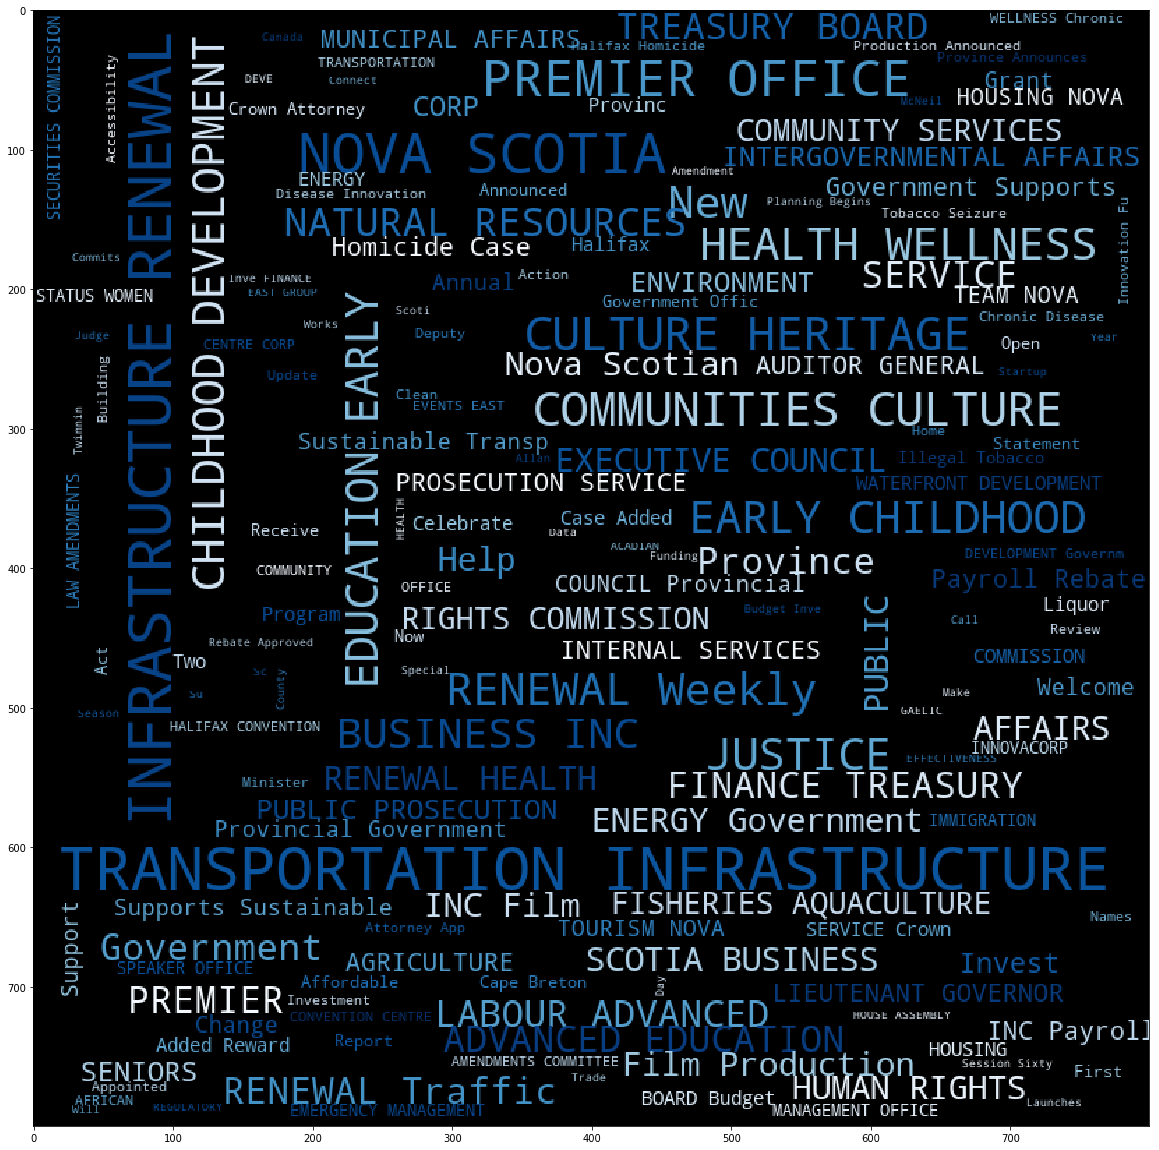

In [24]:
plt.imshow(wordcloud)

In [25]:
plt.show()